# Executive Summary

Skyline Gadgets is an online retailer specializing in a diverse range of electronics and accessories, including phones, computers, home electronics, and related categories. As the company scales its operations and transitions from spreadsheet-based tracking to data-driven decision making, this exploratory data analysis (EDA) project provides a foundational understanding of product performance, category-level trends, and revenue-driving behavior.

The goal of this analysis is to uncover actionable insights into what sells best, when it sells, and how much revenue is being generated across different segments. Using a cleaned sales dataset and Python-based tools (pandas, NumPy, matplotlib), the analysis explores both summary statistics and time-based trends to assist the business in smarter stocking, targeted promotions, and more effective resource allocation.

# Objectives

- Clean and prepare historical sales data by handling missing values and standardizing formats  
- Create a revenue metric to evaluate performance at both product and category levels  
- Identify top-performing products and categories by total revenue  
- Analyze monthly revenue trends to detect seasonal or cyclical sales patterns  
- Visualize key findings using clear, interpretable charts  
- Provide concrete business recommendations and highlight data quality concerns


# Step 1: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load Data

In [2]:
data = pd.read_excel("May Cohort Sales_data.xlsx")

In [3]:
data.head()

,id,product,category,price,quantity,sale_date
0,71,Phone Case,Accessories,NaN,31.0,2024-11-04
1,28,Monitor,Computers,301.12,NaN,2024-10-11
2,92,Keyboard,Accessories,122.68,29.0,2024-10-31
3,57,Action Figure,Toys,130.38,16.0,2024-10-04
4,70,USB Cable,Accessories,216.03,40.0,2024-10-31


## Quick Check

In [4]:
data.shape

(105, 6)

In [5]:
# Data Summary
data.describe()

,id,price,quantity,sale_date
count,105.000000,78.000000,86.000000,84
mean,49.457143,253.579231,28.093023,2024-07-16 05:08:34.285714176
min,1.000000,20.350000,1.000000,2024-01-16 00:00:00
25%,24.000000,140.750000,17.000000,2024-02-27 18:00:00
50%,49.000000,262.205000,28.000000,2024-08-23 12:00:00
75%,75.000000,364.890000,40.750000,2024-10-31 00:00:00
max,100.000000,492.960000,50.000000,2024-12-31 00:00:00
std,29.458585,130.127063,14.348296,NaN


In [6]:
# Datatypes and Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         105 non-null    int64         
 1   product    105 non-null    object        
 2   category   105 non-null    object        
 3   price      78 non-null     float64       
 4   quantity   86 non-null     float64       
 5   sale_date  84 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 5.1+ KB


## Handling Missing Values & Incorrect Datatypes before Step 3

In [7]:
# With Mean
cols = ["price", "quantity"]
data[cols] = data[cols].fillna(data[cols].mean())

In [8]:
#Change Datatype to Category
data["product"] = data["product"].astype('category')
data["category"] = data["category"].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         105 non-null    int64         
 1   product    105 non-null    category      
 2   category   105 non-null    category      
 3   price      105 non-null    float64       
 4   quantity   105 non-null    float64       
 5   sale_date  84 non-null     datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(2), int64(1)
memory usage: 4.5 KB


# Step 3: Create a revenue column (price x quantity)

In [10]:
data["revenue"] = data["price"] * data["quantity"]

In [11]:
data.head(3)

,id,product,category,price,quantity,sale_date,revenue
0,71,Phone Case,Accessories,253.579231,31.000000,2024-11-04,7860.956154
1,28,Monitor,Computers,301.120000,28.093023,2024-10-11,8459.371163
2,92,Keyboard,Accessories,122.680000,29.000000,2024-10-31,3557.720000


In [12]:
# Extract the Month from the Date Column

data["month"] = data["sale_date"].dt.month_name()

In [13]:
data.head(10)

,id,product,category,price,quantity,sale_date,revenue,month
0,71,Phone Case,Accessories,253.579231,31.000000,2024-11-04,7860.956154,November
1,28,Monitor,Computers,301.120000,28.093023,2024-10-11,8459.371163,October
2,92,Keyboard,Accessories,122.680000,29.000000,2024-10-31,3557.720000,October
3,57,Action Figure,Toys,130.380000,16.000000,2024-10-04,2086.080000,October
4,70,USB Cable,Accessories,216.030000,40.000000,2024-10-31,8641.200000,October
5,46,Couch,Furniture,186.000000,17.000000,2024-10-22,3162.000000,October
6,53,Phone Case,Accessories,436.450000,28.093023,NaT,12261.200000,NaN
7,9,Chair,Furniture,265.260000,28.093023,NaT,7451.955349,NaN
8,7,Phone Case,Accessories,253.579231,28.093023,NaT,7123.807227,NaN
9,3,Doll,Toys,253.579231,27.000000,2024-12-16,6846.639231,December


In [14]:
# With "Unknown"

data["month"] = data["month"].fillna("Unknown")

In [15]:
data.head(10)

,id,product,category,price,quantity,sale_date,revenue,month
0,71,Phone Case,Accessories,253.579231,31.000000,2024-11-04,7860.956154,November
1,28,Monitor,Computers,301.120000,28.093023,2024-10-11,8459.371163,October
2,92,Keyboard,Accessories,122.680000,29.000000,2024-10-31,3557.720000,October
3,57,Action Figure,Toys,130.380000,16.000000,2024-10-04,2086.080000,October
4,70,USB Cable,Accessories,216.030000,40.000000,2024-10-31,8641.200000,October
5,46,Couch,Furniture,186.000000,17.000000,2024-10-22,3162.000000,October
6,53,Phone Case,Accessories,436.450000,28.093023,NaT,12261.200000,Unknown
7,9,Chair,Furniture,265.260000,28.093023,NaT,7451.955349,Unknown
8,7,Phone Case,Accessories,253.579231,28.093023,NaT,7123.807227,Unknown
9,3,Doll,Toys,253.579231,27.000000,2024-12-16,6846.639231,December


# Step 4: Basic NumPy Stats

In [16]:
prices = data["price"].to_numpy()
print("Average price:", np.mean(prices))
print("Highest price:", np.max(prices))
print("Lowest price:", np.min(prices))

Average price: 253.5792307692308
Highest price: 492.96
Lowest price: 20.35


# Step 5: Group Data with Pandas

In [17]:
# Revenue by Category

data.groupby("category", observed=True)["revenue"].sum()

category
Accessories    134111.274597
Computers      212264.080483
Electronics     96442.133077
Furniture      147901.483184
Toys           172833.409070
Name: revenue, dtype: float64

In [18]:
# Top Product by Revenue

data.groupby("product", observed=True)["revenue"].sum().sort_values(ascending=False).head(5)

product
Board Game    64868.936512
Monitor       57848.709928
Desktop       48405.504866
Desk          46003.846744
Headphones    43054.501538
Name: revenue, dtype: float64

# **Step 6: Monthly Revenue Trend**

In [19]:
# Revenue by Month
data.groupby("month", observed=True)["revenue"].sum()

month
April         38978.093846
August        59790.977227
December     108869.960555
February      85555.141324
January      100433.818122
July           9300.367227
June          78817.316154
March         11457.690000
May            7605.960000
November      22888.727692
October       86169.481163
September      6398.480000
Unknown      147286.367102
Name: revenue, dtype: float64

In [20]:
# Highest Revenue by Month

data.groupby("month", observed=True)["revenue"].sum().sort_values(ascending=False).head(4)

month
Unknown     147286.367102
December    108869.960555
January     100433.818122
October      86169.481163
Name: revenue, dtype: float64

# **Step 7: Visualization with Matplotlib**

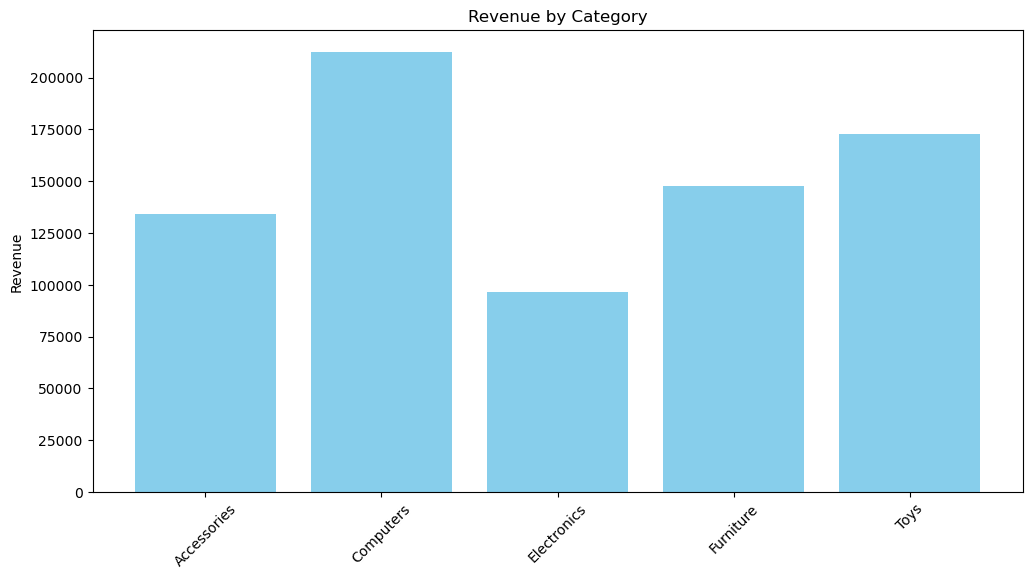

In [21]:
# Revenue by Category
revenue_by_category = data.groupby("category", observed=True)["revenue"].sum()

plt.figure(figsize=(12, 6))

plt.bar(revenue_by_category.index, revenue_by_category.values, color='skyblue')
plt.title("Revenue by Category")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

# 1. 1. Revenue by Category
Key Observations:
	• Computers is the highest revenue-generating category, exceeding $210,000.
	• Toys and Furniture follow closely, both earning between $170,000–$180,000.
	• Accessories sits in the mid-range at around $135,000.
	• Electronics generates the lowest revenue, just under $100,000.
Analysis:
	• The dominance of Computers suggests strong performance in high-ticket items like desktops and monitors.
	• Toys being in the top three may indicate either volume-driven sales or popular, high-margin products.
	• Electronics underperformance could be due to lower sales volume, high return rates, or pricing issues.
	• Inventory prioritization and category-specific promotions should focus on Computers and Toys.
	• Electronics may need a strategic review: reassess pricing, bundles, or product mix.


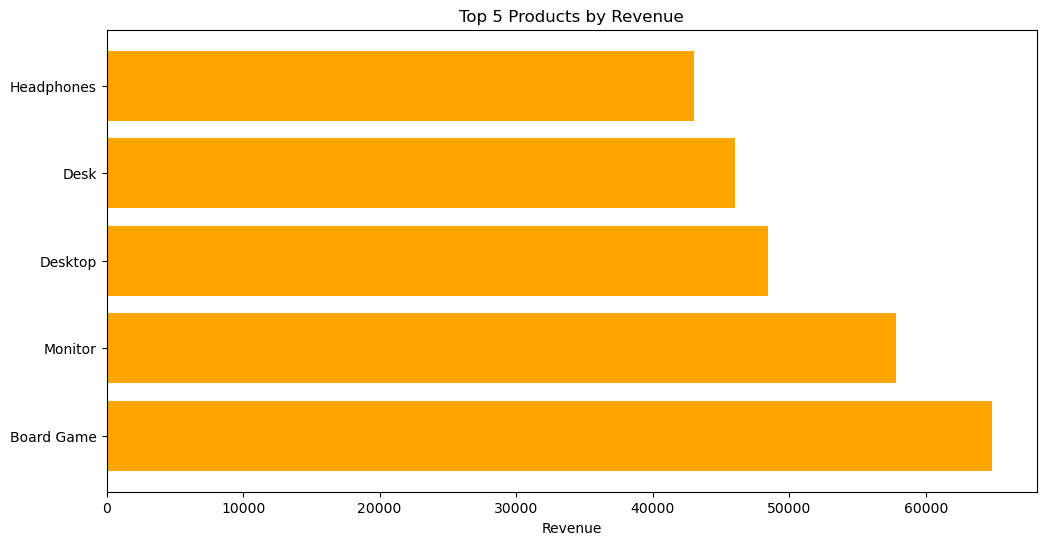

In [22]:
# Top Products by Revenue
top_products = (
    data.groupby("product", observed=True)["revenue"]
        .sum()
        .sort_values(ascending=False)
        .head()
)

plt.figure(figsize=(12, 6))

plt.barh(top_products.index, top_products.values, color='orange')
plt.title("Top 5 Products by Revenue")
plt.xlabel("Revenue")
plt.show()

# 2. Top 5 Products by Revenue

### Products Ranked by Revenue:
1. Board Game (Top performer)  
2. Monitor  
3. Desktop  
4. Desk  
5. Headphones  

### Analysis:
- Board Game leading in revenue suggests it has either:
  - A high unit price  
  - High sales volume  
  - Or both — possibly a bundled or seasonal product  
- Monitor and Desktop align with the Computers category's performance, reinforcing its dominance.  
- The presence of Desk and Headphones indicates demand for both work-from-home and entertainment-oriented accessories.  
- Consider promotional bundles (e.g., Desktop + Monitor, or Desk + Headphones).  
- These top 5 products should be highlighted in marketing and prioritized in stock planning.

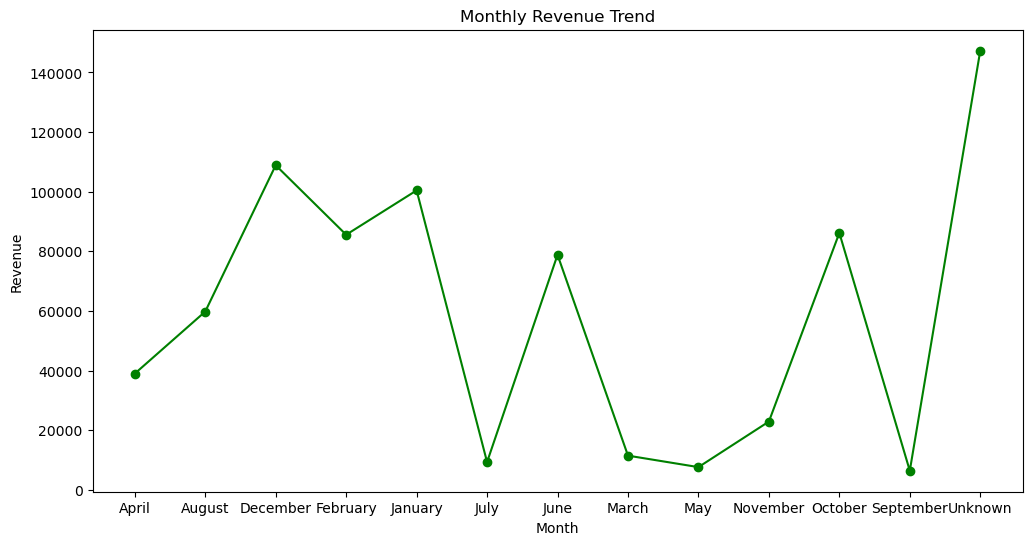

In [23]:
# Monthly Revenue Trend
monthly_revenue = data.groupby("month", observed=True)["revenue"].sum()

plt.figure(figsize=(12, 6))

plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()

# 3. Monthly Revenue Trend

### Key Observations:
- Revenue shows high volatility month-to-month.  
- Peak revenue occurs in the "Unknown" category, likely due to:
  - Missing or malformed date values  
  - Requires fixing at data level  
- Legitimate months with strong revenue:
  - December, January, and June  
- Lows appear in May, March, and September  

### Analysis:
- The December-January peak suggests strong holiday season sales, which is typical in retail.  
- June may correlate with mid-year promotions or clearance cycles.  
- Low revenue in May and September could be attributed to seasonality or weaker campaigns.  
- The "Unknown" category must be cleaned — those sales should be redistributed to valid months.  
- A seasonality model could help optimize stock and promotions throughout the year.

# Strategic Recommendations for Skyline Gadgets

## 1. Product Category Strategy

### a. Computers (Highest Revenue Category)
- Action: Maintain strong inventory levels for desktops, monitors, and related accessories.  
- Reasoning: This category drives the most revenue and is backed by multiple top-selling products.  
- Next Steps:
  - Expand variety (e.g., different price tiers or specs).  
  - Consider upselling and cross-selling strategies (e.g., bundling computers with accessories).  
  - Monitor return rates or customer satisfaction to ensure quality is not a limiting factor.  

### b. Toys (Top 3 Revenue Category)
- Action: Treat this category as a seasonal growth lever.  
- Reasoning: Likely benefits from Q4 holiday demand and could be volume-driven.  
- Next Steps:
  - Identify top-selling SKUs within the Toys category.  
  - Align promotions with holiday campaigns (e.g., Black Friday, Christmas).  
  - Analyze margins — high volume does not always imply high profit.  

### c. Electronics (Lowest Revenue Category)
- Action: Conduct a diagnostic review.  
- Reasoning: Underperforms despite likely overlap with consumer demand.  
- Next Steps:
  - Audit products under this category: identify low sellers, stockouts, or pricing mismatches.  
  - Compare views-to-purchases (if web analytics is available).  
  - Consider repositioning or phasing out certain SKUs.  

## 2. Product-Level Strategy

### a. Board Game (Top Product)
- Action: Leverage as a hero product in marketing and bundling.  
- Reasoning: Highest revenue indicates strong demand or wide appeal.  
- Next Steps:
  - Bundle with complementary items (e.g., Toys or Accessories).  
  - Feature in seasonal promotions, especially during Q4.  
  - Monitor inventory levels closely to avoid stockouts.  

### b. Monitor, Desktop, Desk, Headphones
- Action: Develop themed bundles for productivity or entertainment.  
- Reasoning: These products span both Computers and Home Office themes.  
- Next Steps:
  - Create “Work-from-Home Kits” or “Gaming Starter Packs.”  
  - Run limited-time offers on bundles to increase average order value (AOV).  
  - Track bundle performance versus individual SKU sales to assess cannibalization risk.  

## 3. Monthly Trends & Seasonality

### a. December, January, June (High Revenue Months)
- Action: Plan and front-load inventory in advance of these months.  
- Reasoning: Consistent sales spikes in these months indicate cyclical demand.  
- Next Steps:
  - Start marketing at least 4–6 weeks ahead of these peaks.  
  - Offer early-bird discounts or exclusive bundles for early buyers.  
  - Use this data to simulate revenue forecasts for upcoming cycles.  

### b. May, March, September (Low Revenue Months)
- Action: Run data-driven promotions to lift revenue in down months.  
- Reasoning: These are missed revenue opportunities.  
- Next Steps:
  - Introduce flash sales, loyalty perks, or clearance campaigns.  
  - Test ad performance with small budgets before scaling.  
  - Collaborate with influencers or email campaigns to boost visibility.  

### c. "Unknown" Month Values
- Action: Address missing or unformatted date entries in the dataset.  
- Reasoning: A large number of transactions are not contributing to the correct monthly insights.  
- Next Steps:
  - Use Excel or pandas to correct malformed dates.  
  - If original timestamps are lost, at least tag entries with estimated month from backup sources (if possible).  
  - Re-run monthly analysis after data is corrected.  

## 4. Operational & Reporting Enhancements

### a. Export and Track Cleaned Metrics
- Automate exports of:
  - Monthly revenue summaries  
  - Category-level and product-level revenue breakdowns  
- Store summaries in a shared repository (Google Drive, SharePoint, GitHub, etc.)  
- Use versioning to track changes over time and spot anomalies early.  

### b. Invest in Dashboarding
- Move from static charts to live dashboards (e.g., Power BI, Google Data Studio, Tableau).  
- Benefits:
  - Real-time visibility for non-technical team members  
  - Easier performance tracking by month or campaign  
- Include filters for time, category, and product.  

## 5. Data Quality and Governance

### a. Data Validation at Entry
- Ensure future sales files have:
  - Valid date formats (YYYY-MM-DD)  
  - No missing prices or quantities  
  - Cleaned category and product names (no duplicates caused by typos)  

### b. Data Schema
- Create a data dictionary that defines:
  - Valid values for each field  
  - Expected formats  
  - Required fields  
- Use validation rules in Excel or upstream systems to prevent future issues.  

---
